## Load the dataset from Kaggle

In [ ]:
#install kaggle 
! pip install -q kaggle

In [ ]:
#you need to uplaod kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kylegraupe/wind-turbine-image-dataset-for-computer-vision

100% 359M/360M [00:19<00:00, 22.6MB/s]
100% 360M/360M [00:19<00:00, 19.3MB/s]


In [ ]:
#unzip the downaload data
!unzip wind-turbine-image-dataset-for-computer-vision.zip

In [ ]:
#Discover the total images are their
import os 
train_len = len(os.listdir("train/images"))
test_len= len(os.listdir("test/images"))
valid_len = len(os.listdir("valid/images"))

print(f"There is {train_len} training images ,{test_len} testing images and {valid_len} validation images")

There is 2522 training images ,123 testing images and 240 validation images


In [ ]:
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

: 

In [ ]:
#display image
image_name = os.listdir("train/images")[0]
file_path = f"train/images/{image_name}"
Image(filename=file_path)

In [ ]:
#Read the annotation file to extract the bounding box
with open(file_path.replace("images","labels")[:-3]+"txt") as f:
  info = f.readlines()

In [ ]:
info

['0 0.0365 0.5359537037037038 0.0045468749999999945 0.00048148148148146464\n',
 '0 0.24953645833333335 0.5209444444444444 0.272 0.7162407407407407\n',
 '0 0.09277604166666667 0.692787037037037 0.12007291666666665 0.31413888888888886\n',
 '0 0.05969270833333332 0.7036944444444444 0.08069791666666666 0.23543518518518516']

In [ ]:
#read image from file path
img = cv2.imread(file_path)

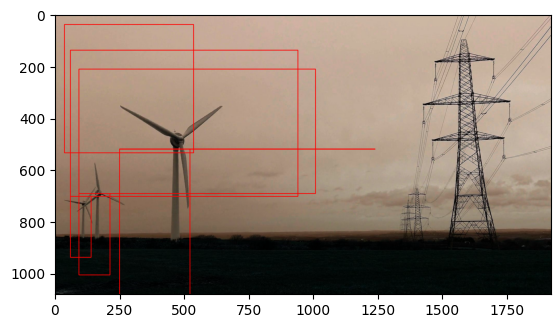

In [ ]:
#display image and draw ractangle on the detected object
color = (255, 0, 0)
for f in info:
  bbox = f.split(' ')
  x ,y,w,h = int(float(bbox[1])*1000),int(float(bbox[2])*1000),int(float(bbox[3])*1000),int(float(bbox[4])*1000)
  image = cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
plt.imshow(image)

## Install the YOLO5 and all the requirement

In [ ]:
%%time
#Clone repository from github.com
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 16 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 14.19 MiB/s, done.
Resolving deltas: 100% (10519/10519), done.
CPU times: user 42.2 ms, sys: 11.8 ms, total: 54 ms
Wall time: 3.84 s


In [ ]:
#install pycocootls for uploading and prepocessing annotation files
!pip install -q -U pycocotools

In [ ]:
# add -q to quit long outputs
!pip install -q -r yolov5/requirements.txt                 #install dependencies
!cp yolov5/requirements.txt ./ 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


## Trained the model

In [ ]:
# start trained the model
%cd /content/yolov5/
!python train.py --img 416 --batch 10 --epochs 5 --data /content/data.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=10, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

In [ ]:
#detecte real time image
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --conf 0.4 --source /content/wind-farm.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/wind-farm.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/wind-farm.jpg: 288x416 12 turbines, 39.3ms
Speed: 0.3ms pre-process, 39.3ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


## Load the model and Test it on image from the web

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


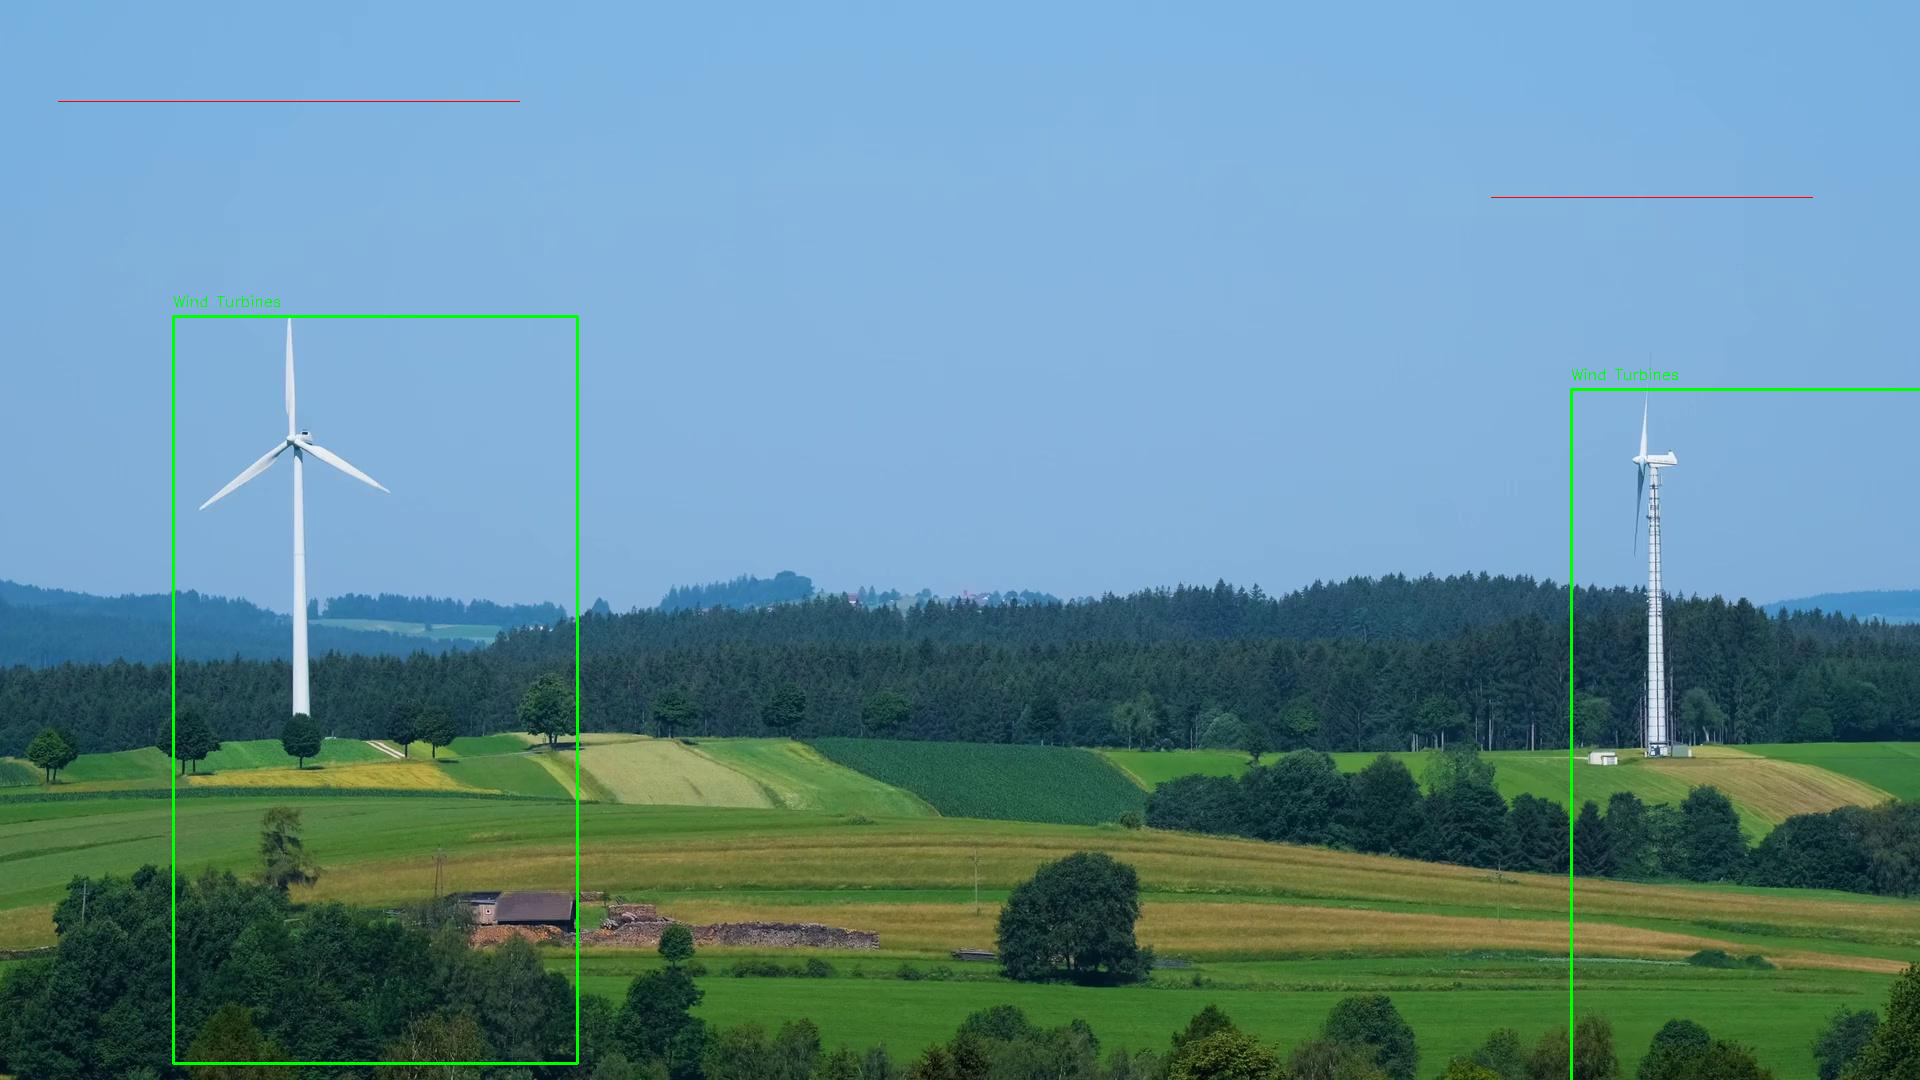

In [120]:
#import the libraries
import torch
from PIL import Image
from google.colab.patches import cv2_imshow
model_path = '/content/yolov5/runs/train/exp2/weights/best.pt'
device = 'cuda'  # replace with 'cuda' if you have a GPU

# Load the YOLOv5 model
model = torch.hub.load('/content/yolov5', 'custom', path=model_path, source='local')

# Load the input image
#img = cv2.imread(img_path)
img = cv2.imread("/content/valid/images/windmill0_jpg.rf.9888e4aa9f9e310cf4522ab23e141bc2.jpg")
# Run the YOLOv5 model on the input image
results = model(img)

# Get the detected objects and their bounding boxes
objects = results.pred[0].detach().cpu().numpy()
font_scale = .5
font_thickness = 1
font_color = (0, 255, 0)
# Draw the bounding boxes on the image
for obj in objects:
    x1, y1, x2, y2, conf, cls = [int(x) for x in obj]
    if obj[4]>0.65:
      cv2.rectangle(img, (x1, y1), (x1+x2, y1+y2), (0, 255, 0), 2)
      cv2.putText(img, 'Wind Turbines', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_color, font_thickness)

# Display the image
cv2_imshow(img)